In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial import distance_matrix

#from sklearn import cluster
#from sklearn.preprocessing import StandardScaler
%matplotlib inline

 ## Input: 1) Base de datos de enzimas ("semillas") clasificadas en dos familias: Familia 1 (4 enzimas) y Familia 2 (3 enzimas).
 ## 2) Base de datos de genomas (17 genomas).
 
 

In [2]:
##Dataframe con el primer blast: Semillas vs Genomas:
df1 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_EF_vs_GenomeDB/pscplos17.blast", sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')


##Dataframe con el segundo blast: Genomas vs Semillas: ("Revisar si en este punto los genomas corresponden
# a los de las familias expandidas")
df2 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_Genomes_vs_EF/vueltalos17.blast.uniq",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')


##Dataframe con el tercer blast: ExpFam_1 vs MIBiG:
df3_1 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_ExpFam_vs_NP/1.fasta_ExpandedVsNp.blast",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')

##Dataframe con el tercer blast: ExpFam_2 vs MIBiG:
df3_2 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_ExpFam_vs_NP/2.fasta_ExpandedVsNp.blast",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')
##Dataframe conel blast: MIBig vs GenomeDB:
df4 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_NP_vs_GenomeDB/NPvsLos17.blast",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')

In [4]:
df2["query"][0]

'gi|6666666.112811.3189|6666666.112811|JOEF01|Cysteine_desulfurase_EC_2.8.1.7|Allokutzneriaalbatas'

In [4]:
df1["query"][90:100]

90    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
91    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
92    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
93    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
94    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
95    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
96    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
97    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
98    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
99    3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...
Name: query, dtype: object

(array([10.,  0.,  0.,  6.,  0.,  0., 28.,  0.,  0., 44.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

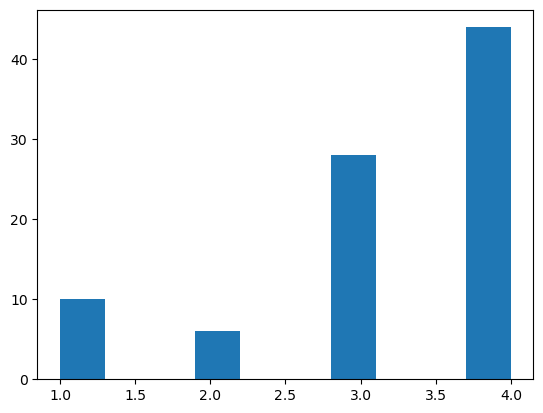

In [28]:
DF1 = df1[df1["bitscore"]>=100]
DF1
#DF1.hist(column = "bitscore")
#DF1["subject"].value_counts().hist()
plt.hist(DF1["subject"].value_counts())


In [29]:
df2["query"]

0      gi|6666666.112811.3189|6666666.112811|JOEF01|C...
1      gi|6666666.111158.304|6666666.111158|NC_013131...
2      gi|6666666.111572.729|6666666.111572|NC_009480...
3      gi|6666666.146872.438|6666666.146872|NC_017803...
4      gi|6666666.112811.5311|6666666.112811|JOEF01|D...
                             ...                        
153    gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...
154    gi|452863.24.129|452863.24|NC_011886.1|D3phosp...
155    gi|6666666.104540.3584|6666666.104540|AOHO01|C...
156    gi|169133.3.1663|169133.3|LAB|Homoserine_dehyd...
157    gi|6666666.112811.3096|6666666.112811|JOEF01|D...
Name: query, Length: 158, dtype: object

In [30]:
df1.describe()
## Enzimas vs Genomas:
## query: identificador | Num de fam | Función_NumSemilla | genoma

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000
mean,39.974917,293.378251,156.380615,4.203310,51.527187,337.513002,53.867612,341.193853,5.516379e-11,205.352246
std,12.111695,97.748995,37.400729,2.656707,45.552621,69.829679,51.258211,75.681174,9.777033e-10,181.943323
min,24.410000,92.000000,40.000000,0.000000,1.000000,279.000000,1.000000,260.000000,0.000000e+00,57.000000
25%,32.130000,238.000000,135.500000,2.000000,7.000000,304.500000,10.000000,300.000000,1.500000e-48,92.050000
50%,35.200000,265.000000,154.000000,4.000000,49.000000,313.000000,48.000000,314.000000,4.000000e-28,115.000000
75%,41.510000,324.500000,176.500000,6.000000,74.000000,325.000000,75.500000,346.000000,2.500000e-20,174.500000
max,81.600000,532.000000,280.000000,13.000000,195.000000,530.000000,302.000000,662.000000,2.000000e-08,847.000000


In [31]:
def extract_GenomeInfo(data):
    genomas_id = []
    genes_id = []
    genomas_nombres = []
    for x in data.subject:
        x_nombre = x.split("|")[-1]
        x_ID = x.split("|")[1]
        x_gi = x_ID.split(".")[0]+"."+ x_ID.split(".")[1]
        x_gen = x_ID.split(".")[2]
        genomas_nombres.append(x_nombre)
        genomas_id.append(x_gi)
        genes_id.append(x_gen)
        
    data["genoma_nombre"] = genomas_nombres
    data["id_genomas"] = genomas_id
    data["id_genes"] = genes_id
    
    data = pd.DataFrame.reindex(data, columns = ['query','subject', "id_genomas", "id_genes", "genoma_nombre",
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'])
    return data
    
df1 = extract_GenomeInfo(df1)
df1
#df1["subject_identif"][df1["subject_identif"]=="JOEF01"]
#df1["subject_identif"].value_counts()   

,query,subject,id_genomas,id_genes,genoma_nombre,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.146852.1090|6666666.146852|NC_00293...,6666666.146852,1090,CorynebacteriumdiphtheriaeNCTC13129s,79.62,530,108,0,1,530,1,530,0.000000e+00,847.0
1,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|749927.13.1727|749927.13|NC_014318.1|D3phos...,749927.13,1727,AmycolatopsismediterraneiU32s,59.59,532,213,2,1,530,1,532,0.000000e+00,620.0
2,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|1156913.7.6305|1156913.7|NC_021252.1|D3phos...,1156913.7,6305,AmycolatopsisorientalisHCCB10007s,59.20,527,214,1,1,526,1,527,0.000000e+00,613.0
3,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.104540.4265|6666666.104540|AOHO01|D...,6666666.104540,4265,AmycolatopsisdecaplaninaDSM44594s,59.20,527,214,1,1,526,1,527,0.000000e+00,612.0
4,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|446462.15.6083|446462.15|NC_021252.1|D3phos...,446462.15,6083,ActinosynnemamirumDSM43827NC0130931s,60.34,532,209,2,1,530,1,532,0.000000e+00,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.146852.774|6666666.146852|NC_002935...,6666666.146852,774,CorynebacteriumdiphtheriaeNCTC13129s,61.33,362,139,1,1,362,11,371,5.000000e-165,471.0
419,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.146872.438|6666666.146872|NC_017803...,6666666.146872,438,ActinoplanesspSE50110s,60.06,363,145,0,1,363,12,374,9.000000e-165,471.0
420,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.111572.2478|6666666.111572|NC_00948...,6666666.111572,2478,ClavibactermichiganensissubspmichiganensisNCPP...,64.64,362,126,2,1,362,302,661,1.000000e-156,460.0
421,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|367928.21.407|367928.21|NC_008618.1|Phospho...,367928.21,407,BifidobacteriumadolescentisATCC15703s,57.30,370,151,2,1,363,11,380,6.000000e-150,433.0


In [32]:
df1.loc[(df1["genoma_nombre"]=="AmycolatopsisdecaplaninaDSM44594s") & (df1["bitscore"]>100)]["id_genes"].value_counts()

4265    4
4027    4
1533    4
4526    3
6732    3
2193    3
2782    1
Name: id_genes, dtype: int64

In [33]:
df1[["id_genomas", "id_genes"]].groupby(by="id_genomas").count()
#Podemos observar el número de copias por gen

,id_genes
id_genomas,
1156913.7,39
169133.3,11
290340.24,31
367928.21,15
442563.11,11
446462.15,19
452863.24,47
649831.6,27
6666666.104540,35


In [34]:
df2["query"][0]
# Genomas vs Enzimas:
# query: gi | identificadorGenoma.IdenificadorGen | IdentificadorGenoma | 


'gi|6666666.112811.3189|6666666.112811|JOEF01|Cysteine_desulfurase_EC_2.8.1.7|Allokutzneriaalbatas'

## Utilizamos la familia de enzimas (EF) como query sobre la base de datos de los genomas.

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          423 non-null    object 
 1   subject        423 non-null    object 
 2   id_genomas     423 non-null    object 
 3   id_genes       423 non-null    object 
 4   genoma_nombre  423 non-null    object 
 5   pc_identity    423 non-null    float64
 6   aln_length     423 non-null    int64  
 7   mismatches     423 non-null    int64  
 8   gaps_opened    423 non-null    int64  
 9   query_start    423 non-null    int64  
 10  query_end      423 non-null    int64  
 11  subject_start  423 non-null    int64  
 12  subject_end    423 non-null    int64  
 13  e_value        423 non-null    float64
 14  bitscore       423 non-null    float64
dtypes: float64(3), int64(7), object(5)
memory usage: 49.7+ KB


In [36]:
df1.head()

,query,subject,id_genomas,id_genes,genoma_nombre,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.146852.1090|6666666.146852|NC_00293...,6666666.146852,1090,CorynebacteriumdiphtheriaeNCTC13129s,79.62,530,108,0,1,530,1,530,0.0,847.0
1,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|749927.13.1727|749927.13|NC_014318.1|D3phos...,749927.13,1727,AmycolatopsismediterraneiU32s,59.59,532,213,2,1,530,1,532,0.0,620.0
2,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|1156913.7.6305|1156913.7|NC_021252.1|D3phos...,1156913.7,6305,AmycolatopsisorientalisHCCB10007s,59.20,527,214,1,1,526,1,527,0.0,613.0
3,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.104540.4265|6666666.104540|AOHO01|D...,6666666.104540,4265,AmycolatopsisdecaplaninaDSM44594s,59.20,527,214,1,1,526,1,527,0.0,612.0
4,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|446462.15.6083|446462.15|NC_021252.1|D3phos...,446462.15,6083,ActinosynnemamirumDSM43827NC0130931s,60.34,532,209,2,1,530,1,532,0.0,595.0


In [37]:
df1.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000
mean,39.974917,293.378251,156.380615,4.203310,51.527187,337.513002,53.867612,341.193853,5.516379e-11,205.352246
std,12.111695,97.748995,37.400729,2.656707,45.552621,69.829679,51.258211,75.681174,9.777033e-10,181.943323
min,24.410000,92.000000,40.000000,0.000000,1.000000,279.000000,1.000000,260.000000,0.000000e+00,57.000000
25%,32.130000,238.000000,135.500000,2.000000,7.000000,304.500000,10.000000,300.000000,1.500000e-48,92.050000
50%,35.200000,265.000000,154.000000,4.000000,49.000000,313.000000,48.000000,314.000000,4.000000e-28,115.000000
75%,41.510000,324.500000,176.500000,6.000000,74.000000,325.000000,75.500000,346.000000,2.500000e-20,174.500000
max,81.600000,532.000000,280.000000,13.000000,195.000000,530.000000,302.000000,662.000000,2.000000e-08,847.000000


# Obtener las familias expandidas:

## Los genomas que aparecen en la columna "subject" son los que forman las familias expandidas. 

In [1]:
df1["query"]

NameError: name 'df1' is not defined

## La información descrita en un query es como sigue:
## ID | familia | función_enzima dentro de la familia | genoma

## La familia 1 tiene 4 enzimas numeradas de 1 al 4, mientras que la familia 2 consta de 3 enzimas númeradas de 1 al 3.

In [39]:
df1["query"][0]

'3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogenase_1|Cglu'

## La información descrita en un subject es:
## GenInfo (gi) | Num de identificación del genoma + num de identificación del gen | Num de identificación del genoma | reference sequence | Organismo 

In [40]:
df1["subject"][0]

'gi|6666666.146852.1090|6666666.146852|NC_002935.2|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CorynebacteriumdiphtheriaeNCTC13129s'

In [41]:
df1["query"].value_counts()

3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogenase_1|Cglu    93
3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogenase_2|Mtub    93
3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogenase_3|Mtub    93
3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogenase_4|Scoe    93
3PGA_AMINOACIDS|2|Phosphoserine_aminotransferase_1|none    17
3PGA_AMINOACIDS|2|Phosphoserine_aminotransferase_2|none    17
3PGA_AMINOACIDS|2|Phosphoserine_aminotransferase_3|none    17
Name: query, dtype: int64

In [42]:
df1["subject"].value_counts()

gi|6666666.146852.1090|6666666.146852|NC_002935.2|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CorynebacteriumdiphtheriaeNCTC13129s                         4
gi|6666666.111158.5905|6666666.111158|NC_0131311|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|CatenulisporaacidiphilaDSM44928s    4
gi|749927.13.2117|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s                                          4
gi|6666666.112811.5447|6666666.112811|JOEF01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|Allokutzneriaalbatas                                              4
gi|649831.6.2685|649831.6|NC_021191.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ActinoplanesspN902109s                                                   4
                                                                                                                                                           ..
gi|6666666.104540.2193|6666666.104540|AOHO01|Phospho

# Por cada enzima en cada familia vamos a obtener su correspondiente familia expandida .
## Primero vamos a identificar cada enzima según su familia y su número dentro de esa familia.


In [43]:
def extract_fam_seed(data):
    fam_list = []
    seed_list = []
    for x in data["query"][:]:
        x_string = x.split("|")
        x_fam = x_string[1]
        x_enz = x_string[2].split("_")[-1]
        #x_value = "F"+x_fam+"S"+x_enz
        fam_list.append(x_fam)
        seed_list.append(x_enz)
    data["fam"] = fam_list
    data["seed"] = seed_list
    data = pd.DataFrame.reindex(data, columns =  ['query','fam','seed','subject', "id_genomas", "id_genes", "genoma_nombre",
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'])
    return data

df1 = extract_fam_seed(df1)
df1
        

,query,fam,seed,subject,id_genomas,id_genes,genoma_nombre,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,1,1,gi|6666666.146852.1090|6666666.146852|NC_00293...,6666666.146852,1090,CorynebacteriumdiphtheriaeNCTC13129s,79.62,530,108,0,1,530,1,530,0.000000e+00,847.0
1,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,1,1,gi|749927.13.1727|749927.13|NC_014318.1|D3phos...,749927.13,1727,AmycolatopsismediterraneiU32s,59.59,532,213,2,1,530,1,532,0.000000e+00,620.0
2,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,1,1,gi|1156913.7.6305|1156913.7|NC_021252.1|D3phos...,1156913.7,6305,AmycolatopsisorientalisHCCB10007s,59.20,527,214,1,1,526,1,527,0.000000e+00,613.0
3,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,1,1,gi|6666666.104540.4265|6666666.104540|AOHO01|D...,6666666.104540,4265,AmycolatopsisdecaplaninaDSM44594s,59.20,527,214,1,1,526,1,527,0.000000e+00,612.0
4,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,1,1,gi|446462.15.6083|446462.15|NC_021252.1|D3phos...,446462.15,6083,ActinosynnemamirumDSM43827NC0130931s,60.34,532,209,2,1,530,1,532,0.000000e+00,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,2,3,gi|6666666.146852.774|6666666.146852|NC_002935...,6666666.146852,774,CorynebacteriumdiphtheriaeNCTC13129s,61.33,362,139,1,1,362,11,371,5.000000e-165,471.0
419,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,2,3,gi|6666666.146872.438|6666666.146872|NC_017803...,6666666.146872,438,ActinoplanesspSE50110s,60.06,363,145,0,1,363,12,374,9.000000e-165,471.0
420,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,2,3,gi|6666666.111572.2478|6666666.111572|NC_00948...,6666666.111572,2478,ClavibactermichiganensissubspmichiganensisNCPP...,64.64,362,126,2,1,362,302,661,1.000000e-156,460.0
421,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,2,3,gi|367928.21.407|367928.21|NC_008618.1|Phospho...,367928.21,407,BifidobacteriumadolescentisATCC15703s,57.30,370,151,2,1,363,11,380,6.000000e-150,433.0


In [44]:
#df1[["fam", "genoma_nombre", "id_genes"]].groupby(by = ["fam", "genoma_nombre"]).count()
#df1.loc[["(fam,seed)", "subject"]].groupby(by = ["(fam,seed)"]).count()


In [63]:
DF12 = df1[df1["bitscore"]>=100]
DF12[["fam","genoma_nombre","id_genes"]].drop_duplicates().value_counts(["fam", "genoma_nombre"]).to_frame("Num_copias").reset_index()
#DF13 = DF12[["fam","genoma_nombre","id_genes"]].drop_duplicates().value_counts(["fam", "genoma_nombre"]).reset_index()
#DF12.rename(columns={'0':'num_copias'})
#DF13.rename(columns={"0": "Num_copias"})

,fam,genoma_nombre,Num_copias
0,1,CatenulisporaacidiphilaDSM44928s,9
1,1,AmycolatopsismediterraneiU32s,8
2,1,ArthrobacterchlorophenolicusA6s,8
3,1,AmycolatopsisorientalisHCCB10007s,7
4,1,AmycolatopsisdecaplaninaDSM44594s,6
5,1,ActinoplanesspN902109s,5
6,1,ArthrobacteraurescensTC1s,5
7,1,ActinosynnemamirumDSM43827NC0130931s,4
8,1,Allokutzneriaalbatas,3
9,1,ActinoplanesspSE50110s,3


# Extraer identificadores de genes 

In [ ]:
dicc

# Obtener matrices de distancias:

In [11]:
df3_1["subject"].value_counts()

BGC0000135_BAK64657    71
BGC0001016_AAO62580    71
BGC0001380_ALI93252    71
BGC0001765_AMD57701    71
BGC0000336_AAX31571    71
BGC0000299_ERG36764    71
BGC0000440_CAE53343    71
BGC0001178_AGS77306    71
BGC0000441_CAG15002    71
BGC0000290_AAC23583    71
BGC0001462_OLZ52462    71
BGC0000455_AEI58859    71
BGC0001461_OLZ50880    71
BGC0000419_AIG79249    71
BGC0001459_OKA09416    71
BGC0001460_EME52996    71
BGC0000317_KFH48730    71
BGC0000418_AIE77051    71
BGC0001667_AQH32479    71
BGC0000406_CAJ14043    71
BGC0001705_ATP76237    71
BGC0001636_BBC83963    71
BGC0001017_AAF00955    71
BGC0001206_AJT38686    66
BGC0001740_BBA21079    32
Name: subject, dtype: int64

In [ ]:
df3_1["query"].value_counts()
df3_1["subject"].value_counts()

In [ ]:
df3_2.head()
df3_2.describe()

In [ ]:
df3_1.describe()

In [ ]:
df3_1["subject"].value_counts()

In [19]:
df2[df2["query"]=="gi|6666666.146852.1090|6666666.146852|NC_002935.2|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CorynebacteriumdiphtheriaeNCTC13129s"]

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
115,gi|6666666.146852.1090|6666666.146852|NC_00293...,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,79.62,530,108,0,1,530,1,530,0.0,847.0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          158 non-null    object 
 1   subject        158 non-null    object 
 2   pc_identity    158 non-null    float64
 3   aln_length     158 non-null    int64  
 4   mismatches     158 non-null    int64  
 5   gaps_opened    158 non-null    int64  
 6   query_start    158 non-null    int64  
 7   query_end      158 non-null    int64  
 8   subject_start  158 non-null    int64  
 9   subject_end    158 non-null    int64  
 10  e_value        158 non-null    float64
 11  bitscore       158 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 14.9+ KB


In [66]:
df4

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,BGC0000001_AEK75490,gi|6666666.146872.8165|6666666.146872|NC_01780...,64.525,358,123,2,1,358,1,354,3.370000e-158,449.0
1,BGC0000001_AEK75491,gi|446462.15.2214|446462.15|NC_021252.1|putati...,40.964,83,49,0,34,116,74,156,9.020000e-15,69.7
2,BGC0000001_AEK75492,gi|649831.6.2413|649831.6|NC_021191.1|putative...,38.272,243,146,3,1,240,25,266,1.200000e-45,154.0
3,BGC0000001_AEK75493,gi|749927.13.892|749927.13|NC_014318.1|putativ...,48.855,393,199,2,6,396,4,396,7.160000e-124,364.0
4,BGC0000001_AEK75494,gi|6666666.111158.4264|6666666.111158|NC_01313...,32.748,968,526,21,36,886,34,993,9.660000e-86,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50283,BGC0001830_AKG06387,gi|6666666.104540.2957|6666666.104540|AOHO01|A...,38.690,336,203,3,25,358,42,376,2.150000e-62,206.0
50284,BGC0001830_AKG06388,gi|446462.15.5438|446462.15|NC_021252.1|Radica...,27.737,137,91,5,130,266,12,140,1.000000e-03,42.0
50285,BGC0001830_AKG06389,gi|6666666.111158.6242|6666666.111158|NC_01313...,58.130,246,102,1,8,252,30,275,5.170000e-96,284.0
50286,BGC0001830_AKG06390,gi|1156913.7.1012|1156913.7|NC_021252.1|dTDPgl...,69.255,322,99,0,1,322,1,322,4.350000e-161,453.0


In [28]:
df2["query"][0]

'gi|6666666.112811.3189|6666666.112811|JOEF01|Cysteine_desulfurase_EC_2.8.1.7|Allokutzneriaalbatas'

In [27]:
df1[df1["query"]=="3PGA_AMINOACIDS|2|Phosphoserine_aminotransferase_3|none"]["subject"].loc[406]

'gi|6666666.111158.8940|6666666.111158|NC_0131311|Phosphoserine_aminotransferase_EC_2.6.1.52|CatenulisporaacidiphilaDSM44928s'

In [24]:
df1["query"][0]

'3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogenase_1|Cglu'

In [29]:
def bitscore_filter(data, threshold):
    data.query("bitscore >= @threshold", inplace = True)
    data.reset_index(drop=True, inplace=True)
    return data